# Parkinson's Disease detection with audio using 1-Dimensional Convolutional Neural Network coded with libraries.

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvidia-smi

Sun Jun 25 20:46:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
path = '/content/drive/MyDrive/HYP TRAIN DATA'  # Path to the audios

# 1. Import the dependencies.

In [ ]:
import librosa
from librosa import feature
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense
import matplotlib.pyplot as plt

# 2. Load the audios with Librosa, and preprocess them using Peak Amplitude Normalization.
- load_audio will return all the audios with their sampling rate.
- to_positive will turn all values to postive numbers (audio is 1D).
- get_max will return the maximum value in each audio array.
- peak_amplitude_normalize will preprocess audios with this formula 10 ** (peak / 20) / maximum_value.

In [ ]:
# Define a function to load the audios which are in a WAV file format
def load_audio(file_path):
     audio, sampling_rate = librosa.load(file_path, sr=44100)
     return audio, sampling_rate

def to_positive(n_array):  # Turn all values to positive values
    for i in range(len(n_array)):
        if n_array[i] < 0:
            n_array[i] = -1 * n_array[i]

    return n_array


def get_max(n_array):  # Get the maximum value
    max_value = n_array[0]
    for i in range(1, len(n_array), 1):
        if n_array[i] > max_value:
            max_value = n_array[i]

    return max_value


def peak_amplitude_normalize(audio_data, peak=-3.0):  # Calculate a scaling factor based on the specific peak value (-3 dB)
    n_array = to_positive(audio_data)                 # and multiply the entire audio signal by the scaling factor
    maximum_value = get_max(n_array)
    scaling = 10 ** (peak / 20) / maximum_value
    normalized_audio = audio_data * scaling
    return normalized_audio

# 3. Load the audios and their corresponding labels and store them in ```X and y ```.
- audios loaded are stored in X and their labels in y.
- Then after data is split into train and test sets.

In [ ]:
# Initialize empty lists to store the audios and y labels
X = []
y = []

# Iterate over the audio files in the directory
for file_name in os.listdir(path):
    if file_name.endswith('.wav'):
      # P means Parkinson's with positive status of 1
      if "P" in file_name:
        y.append(1)

      # C means Control Subject - No Parkinson's with negative status of 0
      if "C" in file_name:
        y.append(0)

      file_path = os.path.join(path, file_name)

        # Load the audios and append them to X
      audio, sr = load_audio(file_path)
      preprocessed_audio = peak_amplitude_normalize(audio)
      X.append(preprocessed_audio)

# Convert the lists to NumPy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 4. Build, compile, and fit the 1DCNN model.
- Create the Sequential model and add Conv1D, MaxPooling1D, GlobalPooling1D, and Dense layers.
- Add MaxPooling1D after every Conv1D layers (with ReLU), then after add two Densely connected layers with ReLU and sigmoid functions respectively.
- Compile the model with 'binary_crossentropy' loss, 'adam' optimizer, and 'accuracy' as a metric.
- Fit the model to the training data.
- Finally plot the history of the model from the result of fitting.

Epoch 1/10
5/5 [==============================] - 5s 716ms/step - loss: 0.6913 - accuracy: 0.5435 - val_loss: 0.6788 - val_accuracy: 0.7500
Epoch 2/10
5/5 [==============================] - 4s 749ms/step - loss: 0.6863 - accuracy: 0.5870 - val_loss: 0.6617 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 3s 666ms/step - loss: 0.6849 - accuracy: 0.5870 - val_loss: 0.6277 - val_accuracy: 0.7500
Epoch 4/10
5/5 [==============================] - 3s 667ms/step - loss: 0.6790 - accuracy: 0.5870 - val_loss: 0.6272 - val_accuracy: 0.7500
Epoch 5/10
5/5 [==============================] - 3s 671ms/step - loss: 0.6809 - accuracy: 0.5870 - val_loss: 0.6125 - val_accuracy: 0.7500
Epoch 6/10
5/5 [==============================] - 3s 677ms/step - loss: 0.6765 - accuracy: 0.5870 - val_loss: 0.6220 - val_accuracy: 0.7500
Epoch 7/10
5/5 [==============================] - 4s 755ms/step - loss: 0.6783 - accuracy: 0.5870 - val_loss: 0.6225 - val_accuracy: 0.7500
Epoch 8/10
5/5 [====

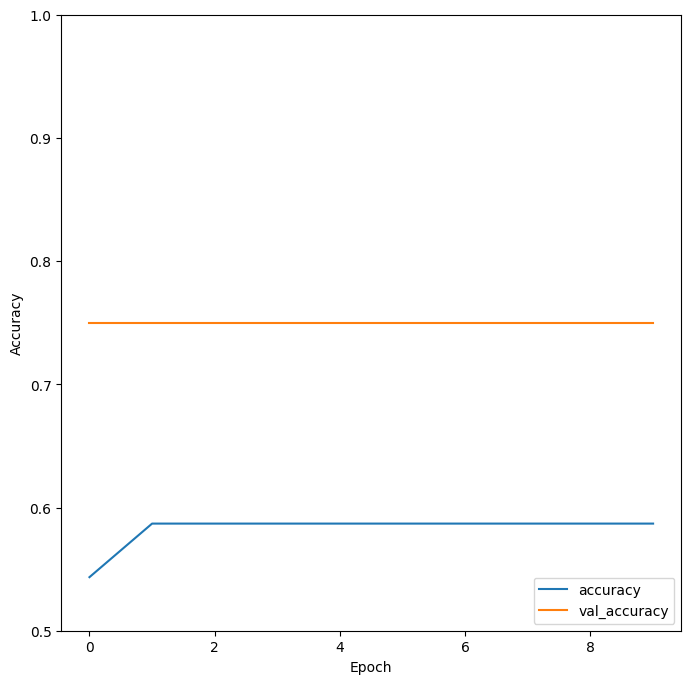

In [ ]:
# Build the 1DCNN
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
his = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

# For plotting the learning curves
plt.figure(figsize=(8, 8))
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.savefig("1dcnn_report.png")

# 5. Save the model

In [ ]:
model.save('1dcnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 6. Other metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = []
threshold = 0.5
for i in range(len(X_test)):
  temp_pred = model.predict(np.expand_dims(X_test[i], 0))
  if temp_pred >= threshold:
    predictions.append(1)
  else:
    predictions.append(0)

print("Evaluation on the validation data.")
print("Accuracy score on the validation data: ", accuracy_score(y_test, predictions))
print("Precision score on the validation data: ", precision_score(y_test, predictions))
print("Recall score on the validation data: ", recall_score(y_test, predictions))
print("F1 score on the validation data: ", f1_score(y_test, predictions))
print("Confusion matrix on the validation data: ", confusion_matrix(y_test, predictions))

1/1 [==============================] - 0s 30ms/step
Evaluation on the validation data.
Accuracy score on the validation data:  0.75
Precision score on the validation data:  0.0
Recall score on the validation data:  0.0
F1 score on the validation data:  0.0
Confusion matrix on the validation data:  [[9 0]
 [3 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
